In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Spring24/DeepLearning/Lab/Question1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Spring24/DeepLearning/Lab/Question1/'
/content/drive/MyDrive/Spring24/DeepLearning/Lab/Question1


# Data Loading



In [ ]:
# Basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# System
import warnings
import os
warnings.filterwarnings("ignore")
%matplotlib inline


In [ ]:
users = pd.read_csv('BX-Users.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
print(users.columns)
books = pd.read_csv('BX-Books.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
print(books.columns)
ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
print(ratings.columns)

Index(['User-ID', 'Location', 'Age'], dtype='object')


Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')
Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


In [ ]:
data = pd.merge(ratings, users, on='User-ID', how='inner')
data = pd.merge(data, books, on='ISBN', how='inner')
print(data.columns)

Index(['User-ID', 'ISBN', 'Book-Rating', 'Location', 'Age', 'Book-Title',
       'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L'],
      dtype='object')


In [ ]:
print('Size of the dataset is: ', data.memory_usage().sum() / 1024**2, ' MB')

Size of the dataset is:  102.270263671875  MB


# EDA

In [ ]:
data.head(5)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          1031136 non-null  int64  
 3   Location             1031136 non-null  object 
 4   Age                  753301 non-null   float64
 5   Book-Title           1031136 non-null  object 
 6   Book-Author          1031135 non-null  object 
 7   Year-Of-Publication  1031136 non-null  object 
 8   Publisher            1031134 non-null  object 
 9   Image-URL-S          1031136 non-null  object 
 10  Image-URL-M          1031136 non-null  object 
 11  Image-URL-L          1031132 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 102.3+ MB


In [ ]:
print('Number of books: ', data['ISBN'].nunique())
print('Number of users: ',data['User-ID'].nunique())

Number of books:  270151
Number of users:  92106


In [ ]:
print("Length of data",len(data))
missing_values = data.isna().sum()
print(missing_values)

Length of data 1031136
User-ID                     0
ISBN                        0
Book-Rating                 0
Location                    0
Age                    277835
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
Image-URL-M                 0
Image-URL-L                 4
dtype: int64


<Axes: xlabel='Age'>

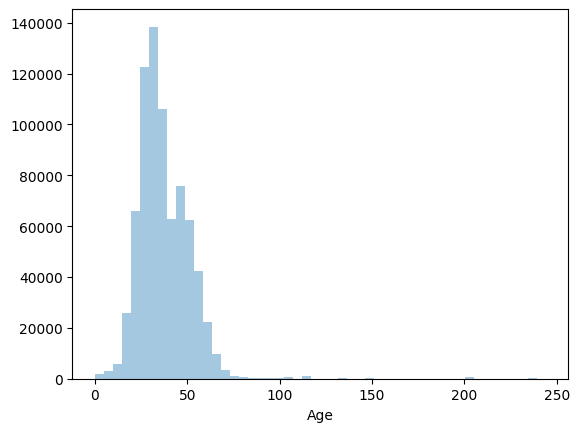

In [ ]:
sns.distplot(data['Age'].dropna(), kde=False)

In [ ]:
print('Number of outliers: ', sum(data['Age'] > 100))


Number of outliers:  2910


In [ ]:
data['Book-Rating'] =data['Book-Rating'].astype(float)

<Axes: xlabel='Book-Rating', ylabel='count'>

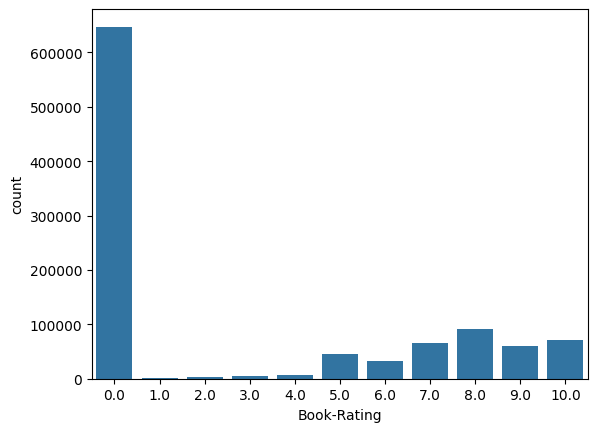

In [ ]:
sns.countplot(x='Book-Rating', data=data)

In [ ]:
print('Average book rating: ', round(data['Book-Rating'].mean(), 2))


Average book rating:  2.84


<Axes: xlabel='Year-Of-Publication'>

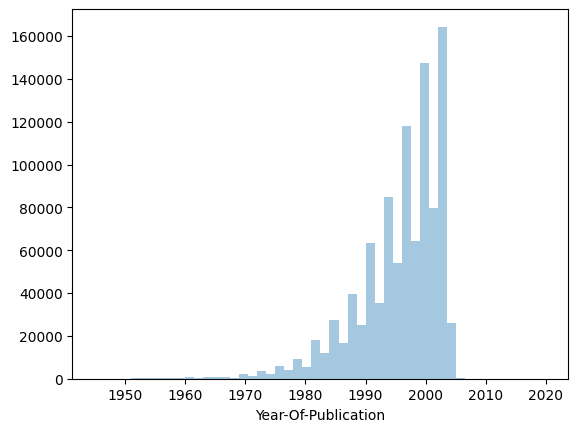

In [ ]:
# Publication by Year
data= data[data['Year-Of-Publication'] != "DK Publishing Inc"]
data= data[data['Year-Of-Publication'] != "Gallimard"]

# data['Year-Of-Publication'] = data['Year-Of-Publication'].astype(int)
data['Year-Of-Publication'] = pd.to_numeric(data['Year-Of-Publication'], errors='coerce').fillna(2099, downcast='infer')


year = pd.to_numeric(data['Year-Of-Publication'], errors='coerce').fillna(2099, downcast='infer')

# Plot the distribution of years
sns.distplot(year, kde=False, hist_kws={"range": [1945, 2020]})

In [ ]:
country = data['Location'].apply(lambda row: str(row).split(',')[-1])
data.groupby(country)['Book-Rating'].count().sort_values(ascending=False).head(10)

Location
 usa               746464
 canada             93000
 united kingdom     33072
 germany            27657
                    24259
 australia          18238
 spain              14968
 n/a                11177
 france             10638
 portugal            6980
Name: Book-Rating, dtype: int64

In [ ]:
data['Age'] = np.where(data['Age']>90, None, data['Age'])

## Impute nulls

In [ ]:
# Categorical feautes
data[['Book-Author', 'Publisher']] = data[['Book-Author', 'Publisher']].fillna('Unknown')

In [ ]:
data[['Book-Author', 'Publisher']].isnull().sum()

Book-Author    0
Publisher      0
dtype: int64

In [ ]:
# Age
median = data["Age"].median()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

In [ ]:
# Check Age
data['Age'].isnull().sum()

0

In [ ]:
data['Country'] = data['Location'].apply(lambda row: str(row).split(',')[-1])
data['State'] = data['Location'].apply(lambda row: str(row).split(',')[-2])
data['City'] = data['Location'].apply(lambda row: str(row).split(',')[-3])
data[['State', 'City','Country']] = data[['State', 'City','Country']].fillna('Unknown')

In [ ]:
data.describe()

,User-ID,Book-Rating,Age,Year-Of-Publication
count,1.031132e+06,1.031132e+06,1.031132e+06,1.031132e+06
mean,1.405944e+05,2.839056e+00,3.615322e+01,1.968195e+03
std,8.052476e+04,3.854159e+00,1.110963e+01,2.311015e+02
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,2.800000e+01,1.992000e+03
50%,1.412100e+05,0.000000e+00,3.500000e+01,1.997000e+03
75%,2.114260e+05,7.000000e+00,4.300000e+01,2.001000e+03
max,2.788540e+05,1.000000e+01,9.000000e+01,2.050000e+03


In [ ]:
data

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,State,City,Country
0,276725,034545104X,0.0,"tyler, texas, usa",46,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,texas,tyler,usa
1,2313,034545104X,5.0,"cincinnati, ohio, usa",23,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,ohio,cincinnati,usa
2,6543,034545104X,0.0,"strafford, missouri, usa",34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,missouri,strafford,usa
3,8680,034545104X,5.0,"st. charles county, missouri, usa",2,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,missouri,st. charles county,usa
4,10314,034545104X,9.0,"beaverton, oregon, usa",28,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,oregon,beaverton,usa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0.0,"fort lee, new jersey, usa",44,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,new jersey,fort lee,usa
1031132,276688,1575660792,7.0,"fort lee, new jersey, usa",25,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,new jersey,fort lee,usa
1031133,276690,0590907301,0.0,"wakeman, ohio, usa",43,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,ohio,wakeman,usa
1031134,276704,0679752714,0.0,"cedar park, texas, usa",31,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,texas,cedar park,usa


In [ ]:
data.to_csv("book_user_dataset.csv")